In [2]:
import numpy as np
import cv2
import seaborn as sns

<Axes: >

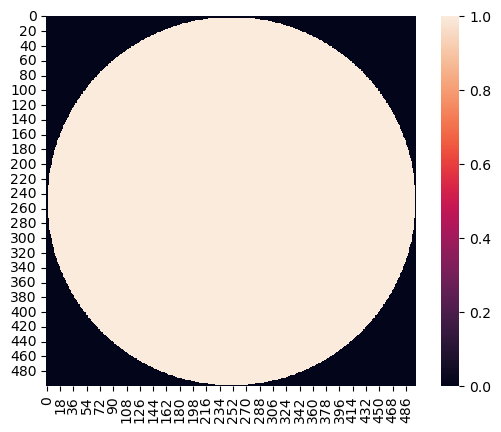

In [10]:
n = 500
r = 249
im = np.zeros((n,n), bool)

for i, row in enumerate(im):
    for j, _ in enumerate(row):
        if (i - (n / 2))**2 + (j - (n / 2))**2 < r**2:
            im[i, j] = 1

sns.heatmap(im, square=True)

<Axes: >

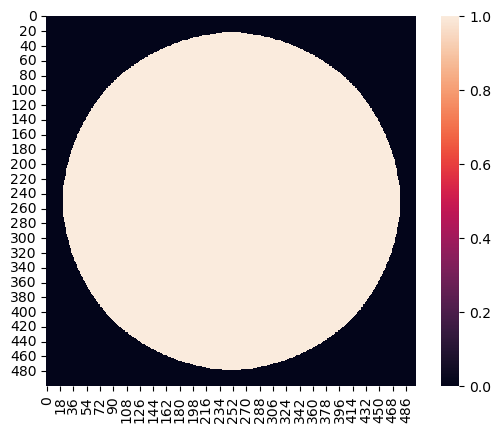

In [12]:
kernel = np.ones((5, 5), np.uint8) 
kernel = np.array([
    [0,1,1,1,0],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [0,1,1,1,0],
], np.uint8)

er_im = cv2.erode(im.astype(np.uint8), kernel, iterations=10)

sns.heatmap(er_im, square=True)

In [24]:
cross = np.zeros((n,n), bool)
cross[n//4:3*n//4] = 1
cross[:, n//4:3*n//4] = 1

square = np.zeros((n,n), bool)
square[n//4:3*n//4,n//4:3*n//4] = 1

In [25]:
kernels = [
    np.ones((5, 5), np.uint8),
    np.array([
        [0,1,1,1,0],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [0,1,1,1,0],
    ], np.uint8),
    np.ones((3,3), np.uint8),
    np.array([
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ])
]

images = [
    im[:,:],
    cross[:,:],
    square[:,:]
]

iterations = [1, 3, 5]

In [26]:
data = []
padding = 50

for k in kernels:
    for img in images:
        for i in iterations:
            data.append({
                "img":img.astype(bool).tolist(),
                "kernel":k.astype(bool).tolist(),
                "iterations":i,
                "result":cv2.erode(np.pad(img.astype(np.uint8), padding, "constant"), k.astype(np.uint8), iterations=i).astype(bool)[padding:-padding,padding:-padding].tolist()
            })

len(data)

36

In [27]:
import json

with open("erosion_test.json", "w") as out:
    json.dump(data, out)

In [28]:
a = np.ones((5,5))
np.pad(a, 5, "constant")[5:-5, 5:-5] == a

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])